In [1]:
pip install statsmodels pandas numpy matplotlib


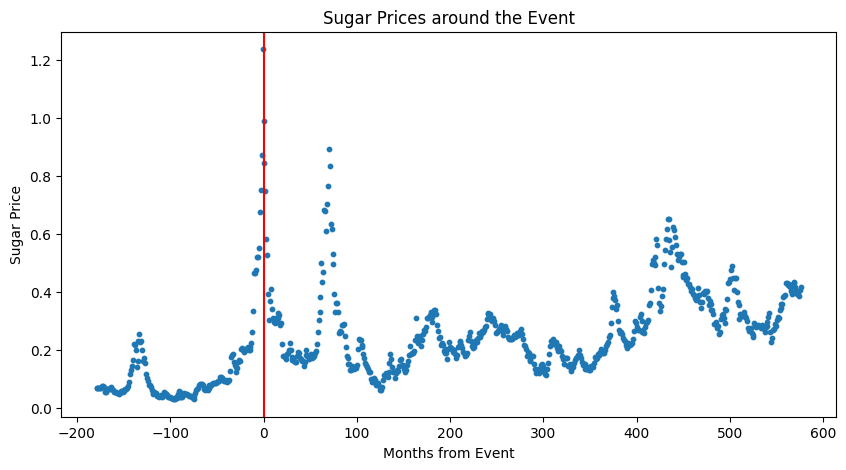

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:            sugar_world   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     2.075
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.182
Time:                        03:28:32   Log-Likelihood:                 1.8948
No. Observations:                  12   AIC:                             2.210
Df Residuals:                       9   BIC:                             3.665
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8543      0.14

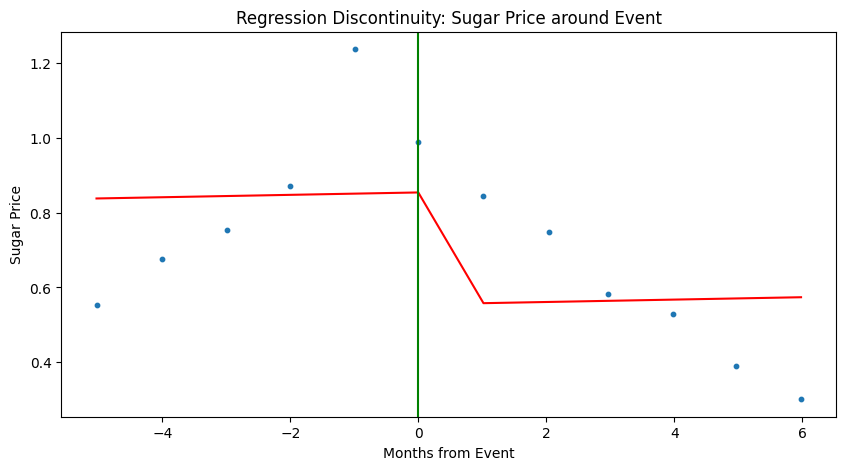

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have a CSV file with 'date' and 'price' columns:
data = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv')
# Make sure 'date' is in datetime format and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Let's say the event is the US embargo on Cuba, date can be set to February 7, 1962 for example
event_date = pd.to_datetime('1974-12-01')

# Add a column for the running variable - the time in months from the event
data['months_from_event'] = (data.index - event_date) / np.timedelta64(1, 'M')

# Add a dummy variable for pre- and post-event
data['post_event'] = (data.index > event_date).astype(int)

# Visualize the prices and see if there's a clear discontinuity
plt.figure(figsize=(10, 5))
plt.scatter(data['months_from_event'], data['sugar_world'], s=10)
plt.axvline(x=0, color='red')  # event line
plt.xlabel('Months from Event')
plt.ylabel('Sugar Price')
plt.title('Sugar Prices around the Event')
plt.show()

# Regression Discontinuity design
# Fit a model where 'price' is a function of the 'post_event' indicator and the 'months_from_event'
# Local Linear Regression around the cutoff

# Define bandwidth, e.g., 6 months
bandwidth = 6
data_rdd = data[(data['months_from_event'] >= -bandwidth) & (data['months_from_event'] <= bandwidth)]

# Fit the regression model
model = smf.ols(formula='sugar_world ~ post_event + months_from_event', data=data_rdd).fit()

# See the summary of the model
print(model.summary())

# It's essential to visualize the regression discontinuity
plt.figure(figsize=(10, 5))
plt.scatter(data_rdd['months_from_event'], data_rdd['sugar_world'], s=10)
plt.plot(data_rdd['months_from_event'], model.fittedvalues, color='red')
plt.axvline(x=0, color='green')  # event line
plt.xlabel('Months from Event')
plt.ylabel('Sugar Price')
plt.title('Regression Discontinuity: Sugar Price around Event')
plt.show()

# The coefficient of 'post_event' will tell us the discontinuous jump at the event time
# If that coefficient is significantly different from zero, then there's evidence of a causal effect

# Interpretation:
# Look at the sign and magnitude of the 'post_event' coefficient.
# If this coefficient is positive and statistically significant,
# it suggests that the event had a causal relationship with an increase in sugar prices.
